# Lista 02 - Probabilidade + Estatística

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy.testing import *
from scipy import stats as ss

plt.style.use('seaborn-colorblind')
plt.ion()

# Exercício 01:


Suponha que a altura de mulheres adultas de algumas regiões seguem uma distribuição normal com $\mu = 162$ centímetros e $\sigma = 8$. Nesse caso, responda às perguntas abaixo:

ID:

(a) Dado que uma mulher mede 180

centímetros, qual a probabilidade de alguém escolhido ao acaso ser maior que ela? Para responder à questão, crie uma função a(), sem parâmetros, que retorna a resposta da questão com uma precisão de 4 casas decimais.

__Dica__:
1. a função round(var, n) retorna o valor da variável var com uma precisão de n casas decimais.
1. a classe `from scipy.stats.distributions import norm` implementa uma normal e já tem um método cdf e um método ppf (inverso da cdf).

In [2]:
# Crie aqui a função a() - com esse nome e sem parâmetros - 
# para retornar a resposta com precisão de 4 casas decimais!

# YOUR CODE HERE
from scipy.stats import norm
from scipy.special import erf
def a():
    return round( 1 - (1 + erf((180 - 162) / np.sqrt(2) / 8)) / 2, 4)

(b) Uma treinadora dessa região quer montar uma equipe de basquete. Para isso, ela quer delimitar uma altura mínima $h$ que as jogadoras devem ter. Ele quer que $h$ seja maior que pelo menos $90\%$ das alturas de mulheres daquela região. Qual o valor de $h$? Para responder à questão, crie uma função _b()_, sem parâmetros, que retorna a resposta da questão com uma precisão de 4 casas decimais.  

__Dica:__  
a função _round(var, n)_ ou _np.round(var, n)_ retorna o valor da variável var com uma precisão de n casas decimais.

In [3]:
#Crie aqui a função b() - com esse nome e sem parâmetros - 
# para retornar a resposta com precisão de 4 casas decimais!

# YOUR CODE HERE
from scipy.special import erfinv
import math
def b():
    return round(162 + 8*math.sqrt(2)*erfinv(2*0.9 - 1), 4)

# Exercício 02:


As seguintes amostras foram geradas seguindo uma distribuição normal N($\mu$, $\sigma$), onde $\mu$, $\sigma$ não necessariamente são os mesmos para ambas. Nos histogramas gerados é possível visualizar essa distribuição.

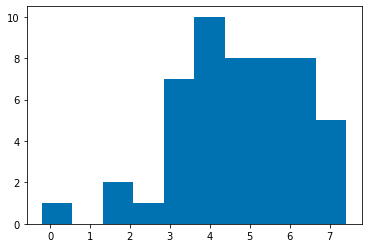

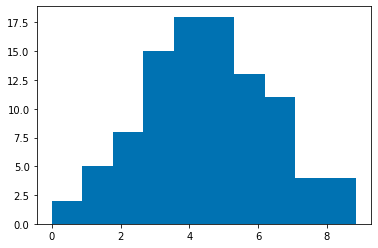

In [4]:
dados1 = [3.8739066,4.4360658,3.0235970,6.1573843,3.7793704,3.6493491,7.2910457,3.7489513,5.9306145,5.3897872,
          5.9091607,5.2491517,7.1163771,4.1930465,-0.1994626,3.2583011,5.9229948,1.8548338,4.8335581,5.2329008,
          1.5683191,5.8756518,3.4215138,4.7900996,5.9530234,4.4550699,3.3868535,5.3060581,4.2124300,7.0123823,
          4.9790184,2.2368825,3.9182012,5.4449732,5.7594690,5.4159924,3.5914275,3.4382886,4.0706780,6.9489863,
          6.3269462,2.8740986,7.4210664,4.6413206,4.2209699,4.2009752,6.2509627,4.9137823,4.9171593,6.3367493]

dados2 = [2.291049832,5.092164483,3.287501109,4.152289011,4.534256822,5.513028947,2.696660244,3.270482741,
          5.435338467,6.244110011,1.363583509,5.385855994,6.069527998,2.148361858,6.471584096,4.953202949,
          6.827787432,4.695468536,2.047598339,8.858080081,5.436394723,7.849470791,4.053545595,3.204185038,
          2.400954454,-0.002092845,3.571868529,6.202897955,5.224842718,4.958476608,6.708545254 -0.115002497,
          5.106492712,3.343396551,5.984204841,3.552744920,4.041155327,5.709103288,3.137316917,2.100906915,
          4.379147487,0.536031040,4.777440348,5.610527663,3.802506385,3.484180306,7.316861806,2.965851553,
          3.640560731,4.765175164,7.047545215,5.683723446,5.048988000,6.891720033,3.619091771,8.396155189,
          5.317492252,2.376071049,4.383045321,7.386186468,6.554626718,5.020433071,3.577328839,5.534419417,
          3.600534876,2.172314745,4.632719037,4.361328042,4.292156420,1.102889101,4.621840612,4.946746104,
          6.182937650,5.415993589,4.346608293,2.896446739,3.516568382,6.972384719,3.233811405,4.048606672,
          1.663547342,4.607297335 -0.753490459,3.205353052,1.269307121,0.962428478,4.718627886,4.686076530,
          2.919118501,6.204058666,4.803050149,4.670632749,2.811395731,7.214950058,3.275492976,2.336357937,
          8.494097155,6.473022507,8.525715511,4.364707111]

plt.hist(dados1)
plt.show()
plt.hist(dados2)
plt.show()

__a)__ A partir dos histogramas, tente aproximar uma normal a cada um deles, desenhando-a sobre o histograma. Para isso, você deve estimar valores de $\mu$ e $\sigma$. Não se esqueça de normalizar os dados, ou seja, o eixo y deve estar um uma escala de 0 a (no máximo) 1!

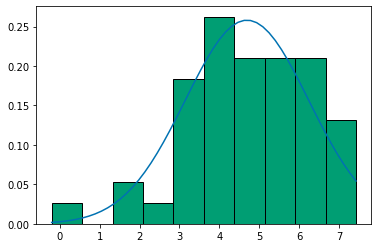

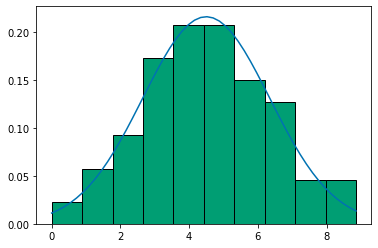

In [5]:
# YOUR CODE HERE

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = np.sqrt(2 * np.pi)
    return (np.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

a1 = np.array(dados1)
a2 = np.array(dados2)

sigma1 = np.std(a1)
sigma2 = np.std(a2)

mu1 = a1.mean()
mu2 = a2.mean()

x1 = np.linspace(a1.min(), a1.max())
x2 = np.linspace(a2.min(), a2.max())

y1 = normal_pdf(x1, mu1, sigma1)
y2 = normal_pdf(x2, mu2, sigma2)


plt.plot(x1, y1)
plt.hist(dados1, density = True, edgecolor='k')
plt.show()

plt.plot(x2, y2)
plt.hist(dados2, density = True, edgecolor='k')
plt.show()

# Exercício 03:


Dado uma tabela com informações sobre uma amostra com 20 alunos contendo a nota desses alunos em algumas disciplinas e os níveis de dificuldade das mesmas, crie uma função que retorne a probabilidade condicional estimada à partir dos dados para dois eventos dados, informando ainda se os eventos são independentes ou não. Ou seja, dado a tabela mostrada no exemplo (lista de listas) e dois eventos A e B, retorne a probabilidade condicional de A dado B (P(A|B)) com uma precisão de 4 casas decimais. O retorno da função, entretanto, deve ser uma frase (string) escrita da seguinte forma: _str: val_ onde _str_ é a string "Independentes" se os eventos A e B são independentes e "Dependentes" caso contrário e _val_ é o valor da probabilidade condicional P(A|B) com uma precisão de 4 casas decimais.


__Dica:__  
a função format(var, '.nf') retorna uma string com o valor da variável var com uma precisão de exatamente n casas decimais.

In [6]:
# Esses dados se referem às notas (A-E) de 20 alunos de acordo com a dificuldade da disciplina (Fácil ou Difícil) 
# Coluna 1: id do aluno
# Coluna 2: dificuldade da disciplina ('Facil' ou 'Dificil')
# Coluna 3: nota do aluno (A-E)
data = [[1, 'Facil', 'C'],
        [2, 'Facil', 'A'],
        [3, 'Dificil', 'E'],
        [4, 'Dificil', 'B'],
        [5, 'Dificil', 'B'],
        [6, 'Dificil', 'A'],
        [7, 'Facil', 'D'],
        [8, 'Dificil', 'C'],
        [9, 'Facil', 'D'],
        [10, 'Facil', 'C'],
        [11, 'Facil', 'A'],
        [12, 'Facil', 'A'],
        [13, 'Dificil', 'B'],
        [14, 'Dificil', 'C'],
        [15, 'Dificil', 'E'],
        [16, 'Dificil', 'C'],
        [17, 'Facil', 'A'],
        [18, 'Dificil', 'D'],
        [19, 'Facil', 'B'],
        [20, 'Facil', 'A']]
data = pd.DataFrame(data, columns=['id', 'dificuldade', 'nota'])
data = data.set_index('id')
#print(data)

def prob_cond(df,
              valor_nota: 'considere como A no bayes',
              valor_dificuldade: 'considere como B no bayes'):
    
    # YOUR CODE HERE
    p_nota = len(df[df['nota'] == valor_nota]) / len(df)
    p_dificuldade = len(df[df['dificuldade'] == valor_dificuldade]) / len(df)
    p_ambos = len(df[(df['nota'] == valor_nota) & (df['dificuldade'] == valor_dificuldade)]) / len(df)
    
    p_cond = format(p_ambos / p_dificuldade,'.4f')
    
    if p_cond == p_dificuldade:
        return 'Independentes: ' + p_cond
    else:
        return 'Dependentes: ' + p_cond
        
        
prob_cond(data, 'A', 'Dificil')

'Dependentes: 0.1000'

In [7]:
"""Check that prob_cond returns the correct output for several inputs"""

assert_equal(prob_cond(data, 'A', 'Facil'), 'Dependentes: 0.5000')
assert_equal(prob_cond(data, 'E', 'Facil'), 'Dependentes: 0.0000')
assert_equal(prob_cond(data, 'A', 'Dificil'), 'Dependentes: 0.1000')
assert_equal(prob_cond(data, 'E', 'Dificil'), 'Dependentes: 0.2000')

# Exercício 04:


Utilizando os dados de acidentes fatais em companhias aéreas dos Estados Unidos de 1985 a 1999, calcule algumas estatísticas básicas. Você deve retornar uma __lista__ com os valores das estatísticas calculadas, sendo elas, nessa ordem: menor valor, maior valor, média, mediana, variância e desvio-padrão. Para responder à questão, crie uma função _estat(acidentes)_ que retorna a lista com os valores correspondentes às resposta da questão, inteiros quando forem inteiros ou com uma precisão de 4 casas decimais caso contrário.

__Teste:__
`assert_equal(estat(acidentes), ans)`, sendo que `ans` é uma lista contendo os valores corretos para as estatísticas que este exercício pede.

__Dicas:__  
1) A função round(var, n) retorna o valor da variável var com uma precisão de n casas decimais.

2) Execute o teste `assert_equal(estat(lista_boba), ans_bobo)` para alguma `lista_boba` que você saiba calcular as estatísticas no papel.


__Fonte:__ https://aviation-safety.net/

In [8]:
# Crie aqui a função estat(acidentes) - com esse nome e parâmetro - 
# a função deve retornar a lista com as respostas com precisão de 4 casas decimais!

acidentes = [0,14,0,1,0,4,1,0,0,2,1,5,0,3,0,0,6,1,1,12,3,1,5,0,3,0,0,1,1,0,1,5,2,1,1,3,4,0,3,0,2,2,1,0,1,1,1,3,0,4,3,8,7,3,0,1]

# YOUR CODE HERE
def estat(acidentes):
    ac = np.array(acidentes)
    lst = []
    
    lst.append(ac.min())
    lst.append(ac.max())
    lst.append(format(ac.mean(),'.4f'))
    lst.append(format(np.median(ac),'.4f'))
    lst.append(format(np.var(ac),'.4f'))
    lst.append(format(np.std(ac),'.4f'))
    
    return lst


# Exercício 05:


Procure encontrar correlações espúrias interessantes e apresente um exemplo encontrado. Ou seja, aprensente dois conjuntos de dados que possuem alta correlação (muito positivas ou muito negativas) sem que um seja de fato o causador do outro. Além disso, deixe resgistrado os gráficos com a distribuição dos dados e um gráfico de dispersão como forma de visualizar a correlação entre os dados. Calcule a covariância e correlação entre os dados e, por fim, se possível, tente explicar qual poderia ser a verdadeira causa da ocorrência das observações. Para isso, utilize a última célula desse notebook.


__Observação:__  
Para ideias de correlações espúrias, veja os seguintes sites:  
http://tylervigen.com/spurious-correlations  
https://en.wikipedia.org/wiki/Spurious_relationship#Other_relationships  


In [9]:
# YOUR CODE HERE
